<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Decision_Tree_Regressor_untuk_Prediksi_Suhu_dan_Kelembapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Metadata Dataset ===
{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitori

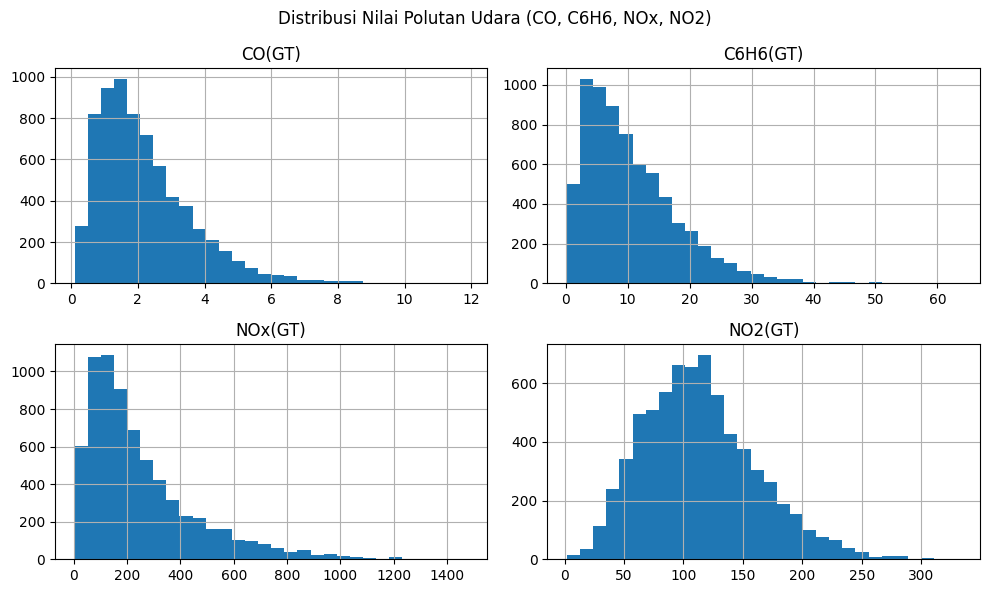


Ukuran data latih: (5552, 4)
Ukuran data uji  : (1389, 4)

Lima baris perbandingan nilai aktual vs prediksi:


,T,RH,T_pred,RH_pred
0,16.8,36.7,17.931868,41.162637
1,16.1,69.5,11.013542,60.855208
2,19.6,47.8,13.432831,45.256024
3,19.3,41.6,11.588636,59.747727
4,18.2,45.9,8.198828,49.770313



=== Metrik Evaluasi untuk Suhu (T) ===
Mean Absolute Error (MAE): 4.718357461562582
Root Mean Square Error (RMSE): 5.998260576937594
Koefisien Determinasi (R²): 0.5183031666125151

=== Metrik Evaluasi untuk Kelembapan (RH) ===
Mean Absolute Error (MAE): 11.69168425313991
Root Mean Square Error (RMSE): 14.658338208666077
Koefisien Determinasi (R²): 0.306077201112682


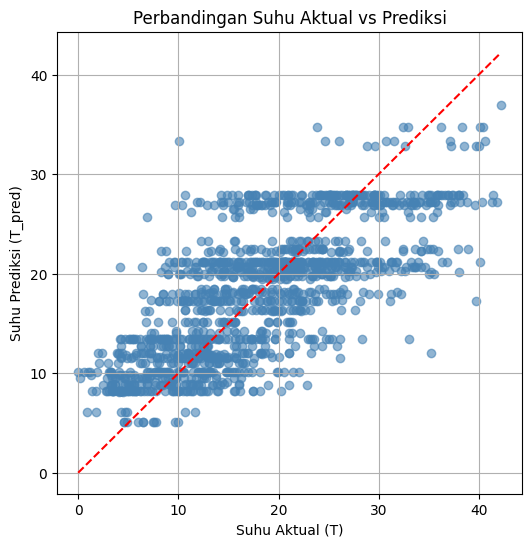

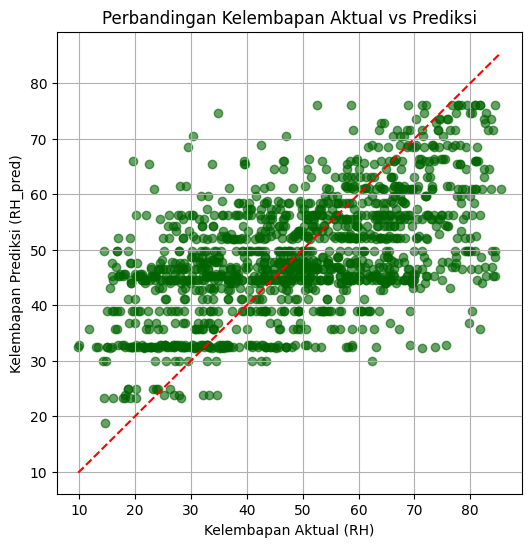

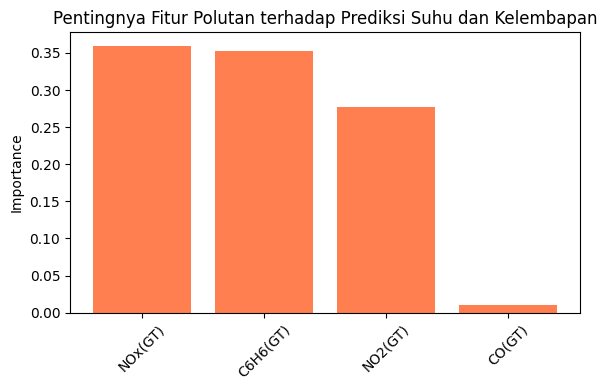

In [3]:
# ==========================================================
# Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Proyek 3 – Decision Tree Regressor untuk Prediksi Suhu dan Kelembapan
# Dataset: Air Quality (UCI Machine Learning Repository, id=360)
# Repo: https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingkungan: Google Colab
# ==========================================================

# 0. Instalasi dan import ucimlrepo (hanya dijalankan sekali)
!pip install ucimlrepo -q

# 1. Import library utama
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Mengambil dataset Air Quality dari UCI Repository
air_quality = fetch_ucirepo(id=360)

# 3. Menampilkan metadata dan struktur variabel
print("=== Metadata Dataset ===")
print(air_quality.metadata)

print("\n=== Daftar Variabel ===")
print(air_quality.variables.head())

# 4. Dataset Air Quality tidak memiliki target eksplisit
#    Semua kolom disimpan dalam air_quality.data.features
data_full = air_quality.data.features.copy()
print("\nUkuran data asli:", data_full.shape)
print("Kolom data:", list(data_full.columns)[:10], "...")

# 5. Menentukan kolom fitur polutan dan target secara manual
kolom_pollutant = ["CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)"]
kolom_target = ["T", "RH"]

# 6. Menangani nilai -200 sebagai missing value
data_full[kolom_pollutant + kolom_target] = data_full[kolom_pollutant + kolom_target].replace(-200, np.nan)

# Menghapus baris yang memiliki NaN pada kolom penting
data_bersih = data_full.dropna(subset=kolom_pollutant + kolom_target)
print("\nUkuran data setelah pembersihan:", data_bersih.shape)

# 7. Menyiapkan fitur (X) dan target (y)
X = data_bersih[kolom_pollutant]
y = data_bersih[kolom_target]

print("\nCek struktur X dan y:")
print("X:", X.shape)
print("y:", y.shape)

# 8. Visualisasi distribusi fitur polutan
X.hist(bins=30, figsize=(10, 6))
plt.suptitle("Distribusi Nilai Polutan Udara (CO, C6H6, NOx, NO2)")
plt.tight_layout()
plt.show()

# 9. Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nUkuran data latih:", X_train.shape)
print("Ukuran data uji  :", X_test.shape)

# 10. Membangun dan melatih model Decision Tree Regressor
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=6,
    min_samples_leaf=20
)
model.fit(X_train, y_train)

# 11. Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Konversi ke DataFrame untuk memudahkan analisis
y_test_df = pd.DataFrame(y_test, columns=kolom_target)
y_pred_df = pd.DataFrame(y_pred, columns=[f"{c}_pred" for c in kolom_target])
hasil = pd.concat([y_test_df.reset_index(drop=True), y_pred_df], axis=1)

print("\nLima baris perbandingan nilai aktual vs prediksi:")
display(hasil.head())

# 12. Evaluasi model menggunakan MAE, RMSE, dan R²
def hitung_metrik(y_true, y_pred, nama):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== Metrik Evaluasi untuk {nama} ===")
    print("Mean Absolute Error (MAE):", mae)
    print("Root Mean Square Error (RMSE):", rmse)
    print("Koefisien Determinasi (R²):", r2)
    return mae, rmse, r2

mae_T, rmse_T, r2_T = hitung_metrik(y_test_df["T"], y_pred_df["T_pred"], "Suhu (T)")
mae_RH, rmse_RH, r2_RH = hitung_metrik(y_test_df["RH"], y_pred_df["RH_pred"], "Kelembapan (RH)")

# 13. Visualisasi: aktual vs prediksi suhu
plt.figure(figsize=(6, 6))
plt.scatter(y_test_df["T"], y_pred_df["T_pred"], alpha=0.6, color='steelblue')
plt.xlabel("Suhu Aktual (T)")
plt.ylabel("Suhu Prediksi (T_pred)")
plt.title("Perbandingan Suhu Aktual vs Prediksi")
min_T = min(y_test_df["T"].min(), y_pred_df["T_pred"].min())
max_T = max(y_test_df["T"].max(), y_pred_df["T_pred"].max())
plt.plot([min_T, max_T], [min_T, max_T], color='red', linestyle='--')
plt.grid(True)
plt.show()

# 14. Visualisasi: aktual vs prediksi kelembapan
plt.figure(figsize=(6, 6))
plt.scatter(y_test_df["RH"], y_pred_df["RH_pred"], alpha=0.6, color='darkgreen')
plt.xlabel("Kelembapan Aktual (RH)")
plt.ylabel("Kelembapan Prediksi (RH_pred)")
plt.title("Perbandingan Kelembapan Aktual vs Prediksi")
min_RH = min(y_test_df["RH"].min(), y_pred_df["RH_pred"].min())
max_RH = max(y_test_df["RH"].max(), y_pred_df["RH_pred"].max())
plt.plot([min_RH, max_RH], [min_RH, max_RH], color='red', linestyle='--')
plt.grid(True)
plt.show()

# 15. Visualisasi: pentingnya fitur (feature importance)
importances = model.feature_importances_
urut = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
plt.bar(range(len(kolom_pollutant)), importances[urut], color='coral')
plt.xticks(range(len(kolom_pollutant)), np.array(kolom_pollutant)[urut], rotation=45)
plt.ylabel("Importance")
plt.title("Pentingnya Fitur Polutan terhadap Prediksi Suhu dan Kelembapan")
plt.tight_layout()
plt.show()
